In [ ]:
# 탠서?

다차원 배열이다.
(배열은? array 이다.)

우리는 array를 다룰때 np.array로 다뤘다.
1차원 배열을 벡터라고 불렀다.
2차원 배열을 행렬이라고 불렀다.
3차원 이상은 지금까지는 따로 주어지는 이름이 없었다.
그래서 3차원 이상은 텐서 라고 불렀다.

그러면 1차원 이상은 텐서가 아니고 2차원 이상도 텐서가 아닌가? 아니다.
텐서가 가장 큰 개념이다.
1차원 텐서를 벡터, 2차원 텐서를 행렬, 3차원 이상을 텐서라고 한다.

텐서보다 작은 개념으로 넘파이.어레이가 있다.
일반적으로는 텐서이며, 아주 소규모로 넘파이에서 텐서를 어레이로 불렀다.
벡터 이전에 스칼라 가 있다. 스칼라는 랭크가 없다. 정도로 알아두기

In [1]:
# 축의 개수 확인
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.ndim

3

In [3]:
# 축의 개수 확인
train_images.shape

(60000, 28, 28)

In [ ]:
(사진 장수, height, width, 덧붙여서 뒤에 칼라 여부로 한개가 더 있다.)

In [4]:
# 데이터 타입 확인
train_images.dtype

dtype('uint8')

In [ ]:
u + int 8
unsigned 는 부호가 없는 상태라는 뜻

8bit = 1 byte
2**8 2의 8 제곱만큼 경우의 수를 표현한다. -> 256가지의 서로 다른 경우의 수를 표현한다.

음수로 치자면
-128 + 127 합하면 256개의 정수가 된다.(+127개인 이유는 중간에 0이 128이 아니다.)

In [ ]:
8byte
ㅁㅁㅁㅁㅁㅁㅁㅁ
첫번째는 부호에 할당되어있다.(기본)
나머지는 숫자

만약 첫번째 칸을 계속 양수라고 표현하고 싶으면 부호에 할당시키지 말고
모든것을 다 숫자로 표현하면 된다. (0~255의 숫자를 할당할 수 있다.)

In [13]:
# 이미지 출력하기
import matplotlib.pyplot as plt

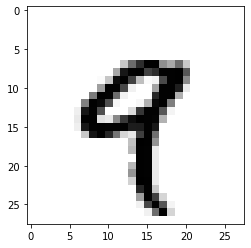

In [11]:
digit = train_images[4]
plt. imshow(digit, cmap=plt.cm.binary)
plt.show()

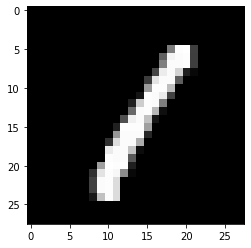

In [17]:
# 4번째 이미지 출력하기
train_images[3, :, : ]
plt. imshow(train_images[3, :, : ], cmap='gray')

In [19]:
# 0~100, 100~200 처럼 100장씩 따로 묶기
slice_1 = train_images[:100]
slice_2 = train_images[:100, :200]

In [21]:
len(slice_2)

100

In [84]:
# for문으로 slice_1...slice_10으로 100개씩 나누기
slice_ = {}

for n in range(int(len(train_images)/100)):
    slice_[n] = train_images[100*n : 100*(n+1)]

slice_[1] 

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3075688776.py, line 5)

# 영화 이진 분류

## IMDB 데이터셋 로드

In [107]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000 쓰여질 수 있는 단어의 갯수를 만개까지 허용하겠다.

In [112]:
train_labels.shape  # 열어보면 1 아니면 0이 들어가있고 그게 25000개가 있다.(긍정부정)

(25000,)

In [109]:
train_data.shape # 열어보면 인덱스 0번에 len은 210개가 들어있다.

(25000,)

In [110]:
train_data # 이 숫자들은 각각 사전에 일치하는 단어들이다.

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

## 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기 (시퀀스:한줄로 쫙 핀다.)

In [119]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [120]:
import numpy as np
X_train = vectorize_sequences(train_data)

In [162]:
X_test = vectorize_sequences(test_data)

In [121]:
X_train.shape

(25000, 10000)

In [124]:
X_train[0][-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

왜 다 00000 으로 출력?

만개의 숫자로 억지로 맞춰주려고 하니 부족한건 다 0으로 채웠다.

## 모델 정의하기

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import Sequential #대문자라는 뜻은 클래스 라는 뜻
from keras import optimizers
from keras.layers import Input, Dense

In [129]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진분류할 때 사용하는 함수가 시그모이드이다.
])

## 모델 컴파일하기

In [133]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

## 검증 세트 준비하기

In [136]:
# 4개의 그림이 나눠지고 있는 과정이다.
partical_X_train = X_train[ :15000]
X_val = X_train[15000 :]
partical_y_train = train_labels[ :15000]
y_val = train_labels[15000: ]

## 모델 훈련하기

In [137]:
# 피팅할때 생기는 값들이 history에 저장된다.
history = model.fit(partical_X_train, partical_y_train,
         epochs=20, batch_size=512,
         validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 13s 105ms/step - loss: 0.5497 - accuracy: 0.7801 - val_loss: 0.4228 - val_accuracy: 0.8577
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3359 - accuracy: 0.8937 - val_loss: 0.3116 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2401 - accuracy: 0.9213 - val_loss: 0.2798 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1874 - accuracy: 0.9393 - val_loss: 0.2699 - val_accuracy: 0.8930
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1556 - accuracy: 0.9496 - val_loss: 0.2736 - val_accuracy: 0.8917
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1264 - accuracy: 0.9611 - val_loss: 0.2885 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1082 - accuracy: 0.9669 - val_loss: 0.3003 - val_accuracy: 0.8862
Epoch 8/20


In [143]:
history.history # .history는 지금까지의 기록을 보여준다.

{'loss': [0.549735963344574,
  0.335948646068573,
  0.24008247256278992,
  0.18741145730018616,
  0.15555965900421143,
  0.1263715773820877,
  0.10823269188404083,
  0.09058698266744614,
  0.07845579087734222,
  0.06406556069850922,
  0.05509861931204796,
  0.04394585266709328,
  0.0390927717089653,
  0.030186805874109268,
  0.026542842388153076,
  0.021969370543956757,
  0.016266407445073128,
  0.01437660213559866,
  0.011550983414053917,
  0.008891992270946503],
 'accuracy': [0.7800666689872742,
  0.8937333226203918,
  0.9213333129882812,
  0.9393333196640015,
  0.9495999813079834,
  0.9611333608627319,
  0.966866672039032,
  0.9740666747093201,
  0.9776666760444641,
  0.9833333492279053,
  0.98580002784729,
  0.9895333051681519,
  0.9904666543006897,
  0.9938666820526123,
  0.9944000244140625,
  0.9951333403587341,
  0.9974666833877563,
  0.9974666833877563,
  0.9986666440963745,
  0.9989333152770996],
 'val_loss': [0.4228317439556122,
  0.31157538294792175,
  0.27983182668685913,
 

In [144]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [147]:
history.history['accuracy']

[0.7800666689872742,
 0.8937333226203918,
 0.9213333129882812,
 0.9393333196640015,
 0.9495999813079834,
 0.9611333608627319,
 0.966866672039032,
 0.9740666747093201,
 0.9776666760444641,
 0.9833333492279053,
 0.98580002784729,
 0.9895333051681519,
 0.9904666543006897,
 0.9938666820526123,
 0.9944000244140625,
 0.9951333403587341,
 0.9974666833877563,
 0.9974666833877563,
 0.9986666440963745,
 0.9989333152770996]

모의고사라고 생각하면 되는데 어떤 모의고사냐. 시험지가 매번 똑같은 모의고사를 치는것이다.

같은 시험지를 매번 치니 정확도가 어마어마하게 올라가게 된다.

In [146]:
history.history['val_accuracy']

[0.857699990272522,
 0.8853999972343445,
 0.892799973487854,
 0.8930000066757202,
 0.891700029373169,
 0.8884999752044678,
 0.8862000107765198,
 0.885200023651123,
 0.8799999952316284,
 0.8817999958992004,
 0.8763999938964844,
 0.8762000203132629,
 0.8756999969482422,
 0.8733000159263611,
 0.8709999918937683,
 0.8697999715805054,
 0.8686000108718872,
 0.8669999837875366,
 0.8658000230789185,
 0.864300012588501]

위에 모의고사를 치고 val 모의고사로 다시 치는데 여긴 신유형 문제가 하나씩 있는셈이다.

## 훈련과 검증 손실 그리기

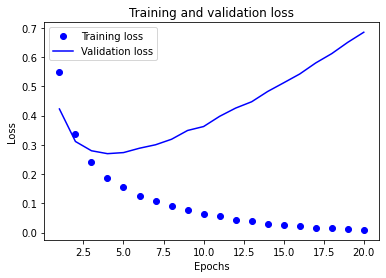

In [150]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

In [ ]:
왼쪽 y 축이 loss
동그라미 loss가 점점 0으로 간다. -> 잘 맞췄다는 뜻
val 은 점점 올라간다 -> 과적합

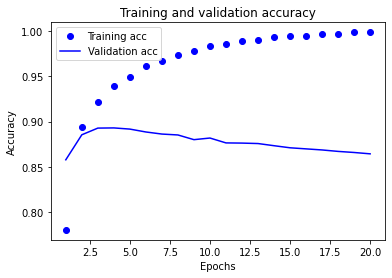

In [151]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

## 모델을 처음주터 다시 훈련하기

In [163]:
# 모델 새로 만들기
model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [164]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics='accuracy')

In [165]:
# 벡터화 p150
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32') 

In [166]:
model.fit(X_train, y_train,
         epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 5s 17ms/step - loss: 0.5093 - accuracy: 0.7929
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.3057 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2230 - accuracy: 0.9259
Epoch 4/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1827 - accuracy: 0.9365


In [169]:
preds = model.predict(X_test)
preds

782/782 [==============================] - 1s 2ms/step


array([[0.313504  ],
       [0.99461496],
       [0.9795508 ],
       ...,
       [0.19530214],
       [0.11415237],
       [0.72017497]], dtype=float32)

확률값이 나왔다.

In [171]:
# 이거 하나면 예측도 하고 평가도 해준다.
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 8s 2ms/step - loss: 0.3052 - accuracy: 0.8777
